## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="images/example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img  = plt.imread("images/DSC_0465.jpg")

In [3]:
img.shape

(3456, 4608, 3)

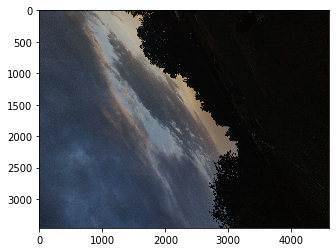

In [4]:
plt.imshow(img)
plt.show()

In [5]:
img.shape

(3456, 4608, 3)

In [6]:
all_pixels = img.reshape((-1, 3))

In [7]:
all_pixels.shape

(15925248, 3)

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(n_clusters= 20)

In [ ]:
km.fit(all_pixels)

In [ ]:
centers = km.cluster_centers_.astype("uint8")

In [ ]:
centers

## Plot dominant colors

In [ ]:
i = 1

plt.figure(figsize=(5,5))

for each_color in centers:
    plt.subplot(10, 3, i)
    i+=1
    plt.axis("off")
    
    
    a = np.zeros((100,100, 3), dtype="uint8")
    a[:, :, :] = each_color
    plt.imshow(a)
    
plt.show()

# Segmenting Original Image

In [15]:
new_img = np.zeros(img.shape, dtype="uint8").reshape((-1, 3))

In [16]:
new_img.shape

(165000, 3)

In [17]:
km.labels_

array([5, 5, 5, ..., 2, 2, 2])

In [18]:
all_pixels

array([[23, 19, 46],
       [25, 21, 48],
       [28, 24, 51],
       ...,
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0]], dtype=uint8)

In [19]:
# assign most dominating color according to group it belongs
for ix in range(new_img.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]

In [20]:
new_img  =  new_img.reshape(img.shape)

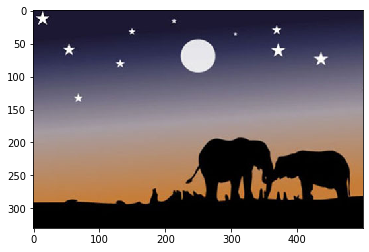

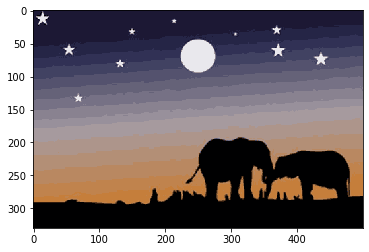

In [21]:
plt.imshow(img)
plt.show()
plt.imshow(new_img)
plt.show()